LESSON2

In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
pd.options.display.max_columns=40

In [269]:
df = pd.read_csv('/hotel_bookings.csv')

In [270]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29264 non-null  object 
 1   is_canceled                     29264 non-null  int64  
 2   lead_time                       29264 non-null  int64  
 3   arrival_date_year               29264 non-null  int64  
 4   arrival_date_month              29264 non-null  object 
 5   arrival_date_week_number        29264 non-null  int64  
 6   arrival_date_day_of_month       29264 non-null  int64  
 7   stays_in_weekend_nights         29264 non-null  int64  
 8   stays_in_week_nights            29264 non-null  int64  
 9   adults                          29264 non-null  int64  
 10  children                        29264 non-null  int64  
 11  babies                          29264 non-null  int64  
 12  meal                            

Обработка пустых значений

In [272]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             461
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6043
company                           26913


In [273]:
df = df.dropna (subset=['country'])

In [274]:
df['company'] = df['company'].fillna(0)

In [275]:
df['agent'] = df['agent'].fillna(0)

In [276]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Обработка дубликатов

In [277]:
df.duplicated().sum()

4996

In [278]:
df = df.drop_duplicates()

In [279]:
df.duplicated().sum()

0

Выбросы

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23807 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23807 non-null  object 
 1   is_canceled                     23807 non-null  int64  
 2   lead_time                       23807 non-null  int64  
 3   arrival_date_year               23807 non-null  int64  
 4   arrival_date_month              23807 non-null  object 
 5   arrival_date_week_number        23807 non-null  int64  
 6   arrival_date_day_of_month       23807 non-null  int64  
 7   stays_in_weekend_nights         23807 non-null  int64  
 8   stays_in_week_nights            23807 non-null  int64  
 9   adults                          23807 non-null  int64  
 10  children                        23807 non-null  int64  
 11  babies                          23807 non-null  int64  
 12  meal                            

lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest , previous_cancellations, previous_bookings_not_canceled, booking_changes, company, days_in_waiting_list , adr, required_car_parking_spaces, total_of_special_requests

In [281]:
recovery_list = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults', 'children', 'babies', 'is_repeated_guest',
                'previous_cancellations', 'previous_bookings_not_canceled',
                'booking_changes', 'company', 'days_in_waiting_list',
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']

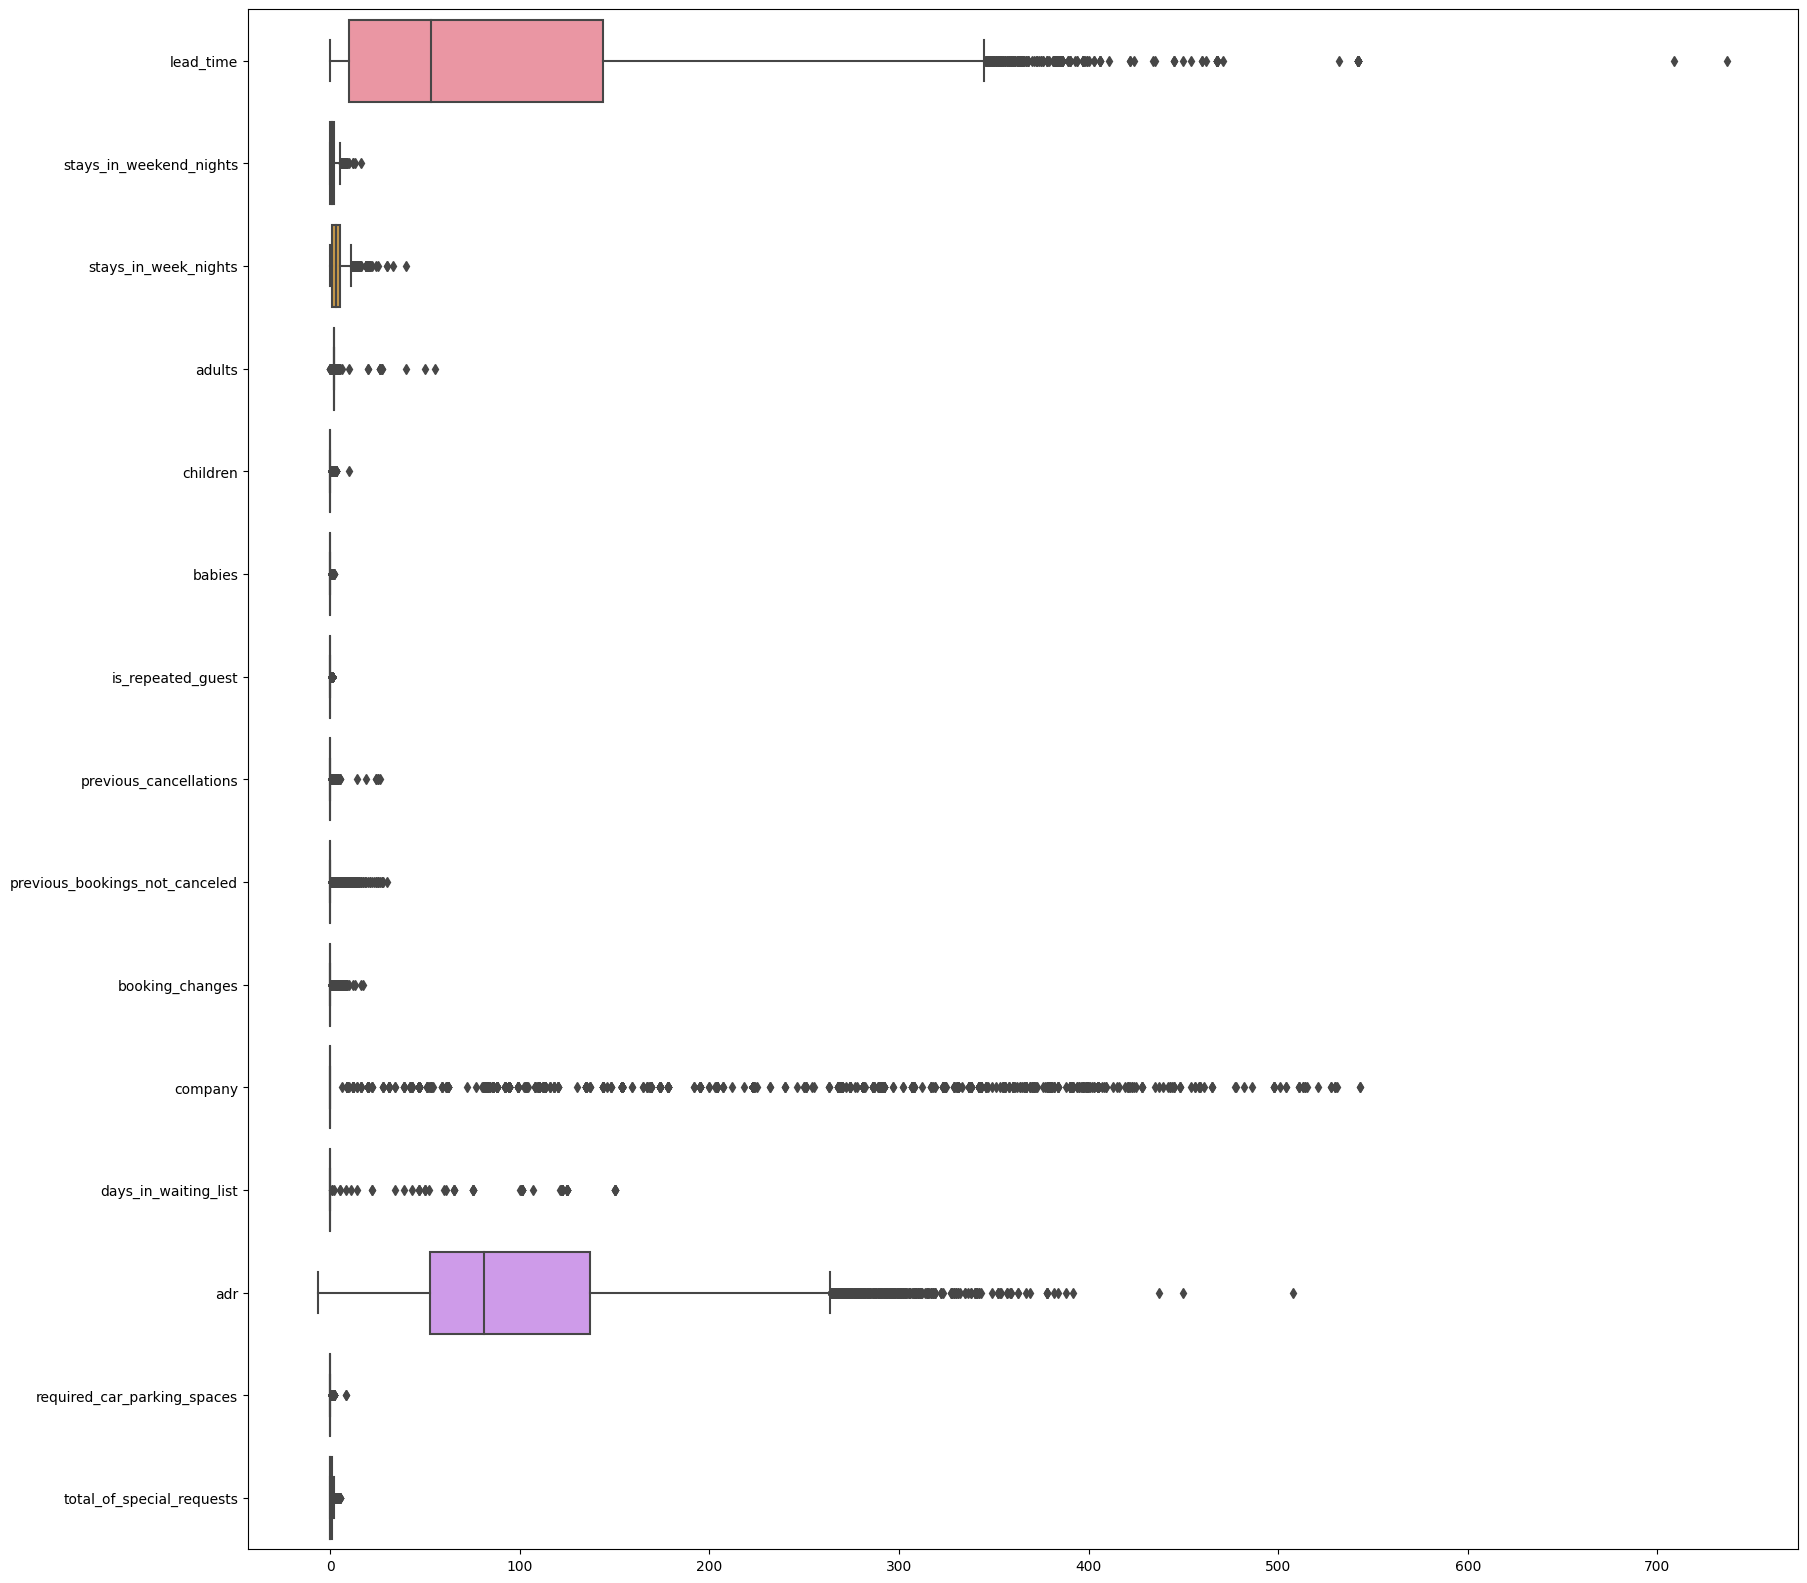

In [282]:
plt.figure(figsize=(20,20))
sns.boxplot(df[recovery_list],orient='h')
plt.show;

In [284]:
z_scores = np.abs(stats.zscore(df[recovery_list]))
treshold = 3
z_scores

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,2.731347,1.075124,1.317950,0.132571,0.321936,0.127388,0.247007,0.069294,0.166701,3.688018,0.245253,0.052779,1.584263,0.401134,0.784743
1,6.968231,1.075124,1.317950,0.132571,0.321936,0.127388,0.247007,0.069294,0.166701,5.048003,0.245253,0.052779,1.584263,0.401134,0.784743
2,0.861961,1.075124,0.911214,1.074816,0.321936,0.127388,0.247007,0.069294,0.166701,0.391938,0.245253,0.052779,0.402049,0.401134,0.784743
3,0.797603,1.075124,0.911214,1.074816,0.321936,0.127388,0.247007,0.069294,0.166701,0.391938,0.245253,0.052779,0.402049,0.401134,0.784743
4,0.786877,1.075124,0.504478,0.132571,0.321936,0.127388,0.247007,0.069294,0.166701,0.391938,0.245253,0.052779,0.039503,0.401134,0.465751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29258,0.550898,0.206921,0.097742,0.132571,0.321936,0.127388,0.247007,0.069294,0.166701,0.968048,0.245253,0.052779,1.489686,2.376586,0.784743
29260,0.111121,0.661281,0.715730,0.132571,0.321936,0.127388,0.247007,0.069294,0.166701,0.391938,0.245253,0.052779,1.426634,0.401134,0.784743
29261,0.500278,0.661281,0.715730,0.132571,0.321936,0.127388,0.247007,0.069294,0.166701,0.391938,0.245253,0.052779,0.007977,0.401134,1.716244
29262,1.422739,0.661281,0.715730,0.132571,0.321936,0.127388,0.247007,0.069294,0.166701,0.391938,0.245253,0.052779,0.437515,0.401134,0.784743


In [286]:
outliers = df[(z_scores > treshold).any(axis=1)]
outliers.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
31,Resort Hotel,0,95,2015,July,27,1,4,11,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,241.0,0.0,0,Transient,63.86,0,0,Check-Out,2015-07-16
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,2,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,0.0,0,Transient,153.00,0,0,Canceled,2015-06-02
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,2,0,BB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.00,1,2,Check-Out,2015-07-03


In [290]:
df_no_outliers = df[(z_scores <= treshold).all(axis=1)]
df_no_outliers.shape

(19141, 32)

Изменение типов данных

In [296]:
df_no_outliers['reservation_status_date'] = pd.to_datetime(df_no_outliers['reservation_status_date'])

<ipython-input-296-b6023712d3e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['reservation_status_date'] = pd.to_datetime(df_no_outliers['reservation_status_date'])


In [297]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19141 entries, 2 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           19141 non-null  object        
 1   is_canceled                     19141 non-null  int64         
 2   lead_time                       19141 non-null  int64         
 3   arrival_date_year               19141 non-null  int64         
 4   arrival_date_month              19141 non-null  object        
 5   arrival_date_week_number        19141 non-null  int64         
 6   arrival_date_day_of_month       19141 non-null  int64         
 7   stays_in_weekend_nights         19141 non-null  int64         
 8   stays_in_week_nights            19141 non-null  int64         
 9   adults                          19141 non-null  int64         
 10  children                        19141 non-null  int64         
 11  ba